In [16]:
import cv2, numpy as np, pathlib
from matplotlib import pyplot as plt

In [17]:
images = pathlib.Path('./')
images = [str(i) for i in images.glob('*.jpg')]

In [18]:
def applyCanny(path):
    img = cv2.imread(path)
    edges = cv2.Canny(img,100,200)
    plt.imshow(edges)
    plt.show()
    return edges,img

In [19]:
def crop_canny(cannyOutput,ideal_aspect = 1920/1080):
    # threshold to get just the signatur
    retval, thresh_gray = cv2.threshold(cannyOutput, thresh=100, maxval=155, type=cv2.THRESH_BINARY)
    # find pixels that are not zero (koşelerin bulunduğu yerler)
    pixelpoints = cv2.findNonZero(thresh_gray)
    pixels = np.squeeze(pixelpoints,1)
    
    pixels = [p[0] for p in pixelpoints]
    # print(pixels)
    # colon ve satırların ayrılması
    cols = np.sort([p[0] for p in pixels])
    cols={'min':cols.min(),'max':cols.max()}
    rows = np.sort([p[1] for p in pixels])
    rows={'min':rows.min(),'max':rows.max()}
    width,height = cols['max']-cols['min'],rows['max']-rows['min']
    aspect = height/width
        
    # elde edilen cropun aspect ratio sunun düzeltilmesi
    crop = cannyOutput[rows['min']:rows['max'], cols['min']:cols['max']] # create a cropped region of the gray image
    # aspect ratio yı düzeltme işlemi
    if aspect > ideal_aspect:
        print("gelen ", aspect, ideal_aspect)
        # crop the left and right edges:
        new_width = int(ideal_aspect * height)
        print("new_width", new_width)
        offset = int(round((width - new_width) / 2))
        print("offset", offset)
        p1 = (rows['min']-offset,rows['max']+offset)
        p2 = (cols['min'],cols['max'])
        print("p's", p1, p2)
        crop = cannyOutput[p1[0]:p1[1],p2[0]:p2[1]] # create a cropped region of the gray image
    else:
        print("gelmeyen ", aspect, ideal_aspect)
        # ... crop the top and bottom:
        new_height = int(width / ideal_aspect)
        print("new_height", new_height)
        offset = int(round((height - new_height) / 2))
        print("offset", offset)
        p1 = (rows['min'],rows['max'])
        p2 = (cols['min']-offset,cols['max']+offset)
        print("p's", p1, p2)
        crop = cannyOutput[rows['min']:rows['max'], cols['min']-offset:cols['max']+offset] # create a cropped region of the gray image   
    plt.imshow(thresh_gray)
    # plt.imshow(crop,'gray')
    plt.show()
    return p1,p2


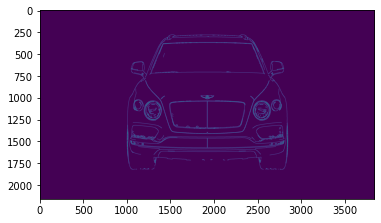

gelmeyen  0.8366793271839392 1.7777777777777777
new_height 1036
offset 253
p's (280, 1822) (745, 3094)


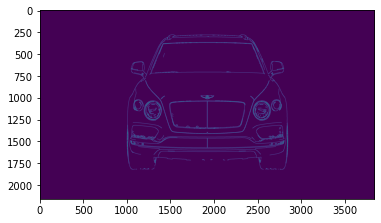

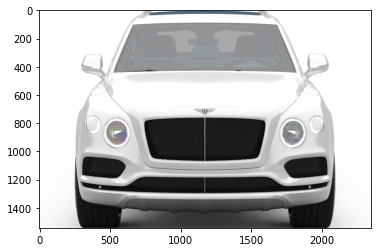

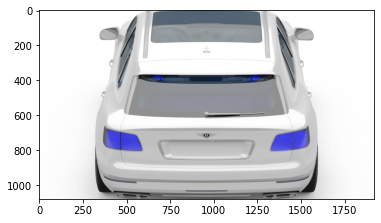

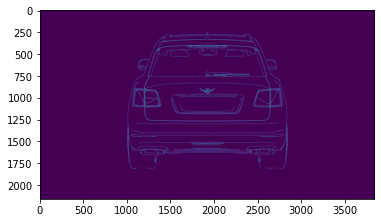

gelmeyen  0.8536318951392682 1.7777777777777777
new_height 1029
offset 267
p's (253, 1816) (737, 3102)


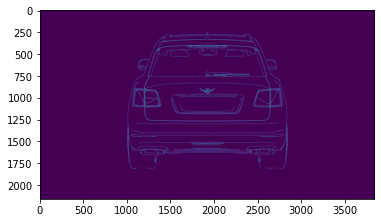

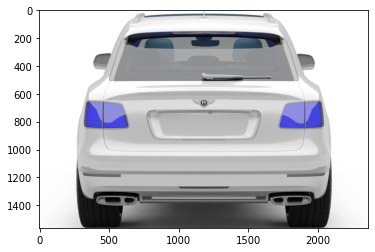

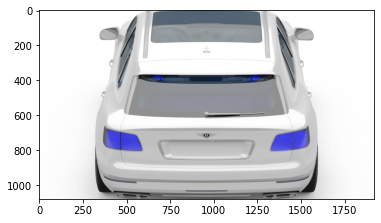

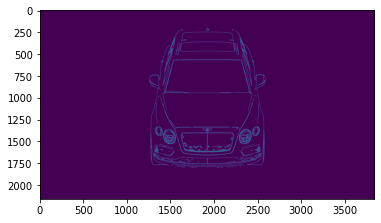

gelmeyen  1.2084273890142965 1.7777777777777777
new_height 747
offset 430
p's (198, 1804) (825, 3014)


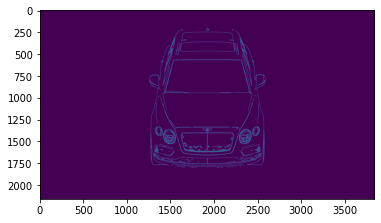

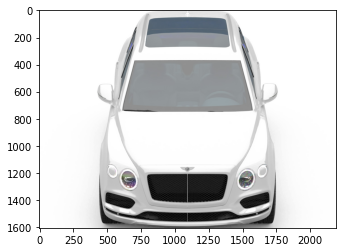

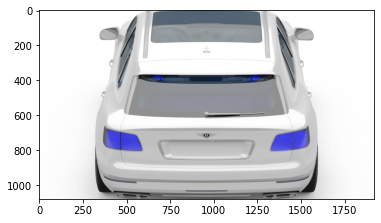

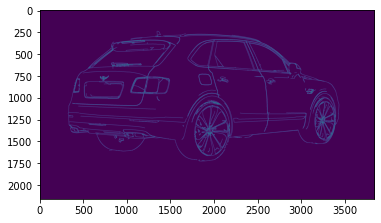

gelmeyen  0.4785829307568438 1.7777777777777777
new_height 1746
offset -130
p's (241, 1727) (452, 3297)


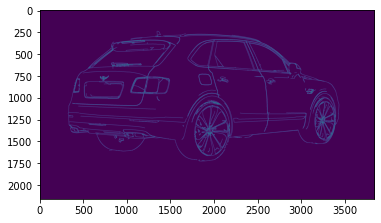

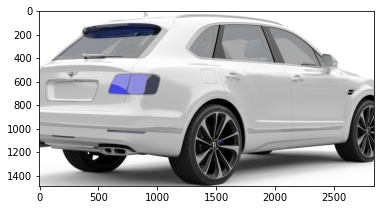

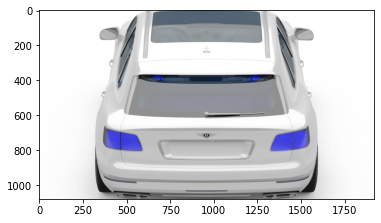

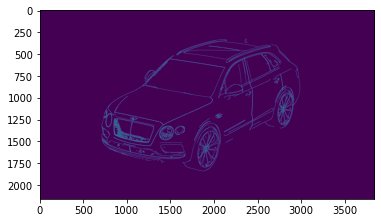

gelmeyen  0.6652001759788825 1.7777777777777777
new_height 1278
offset 117
p's (330, 1842) (590, 3097)


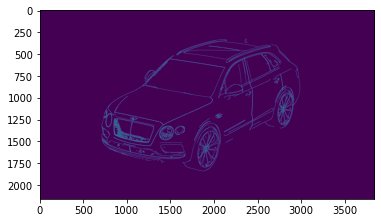

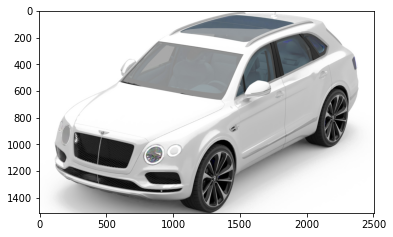

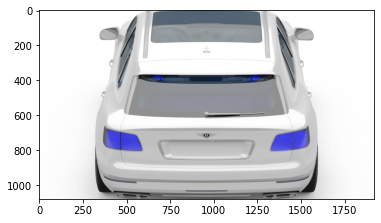

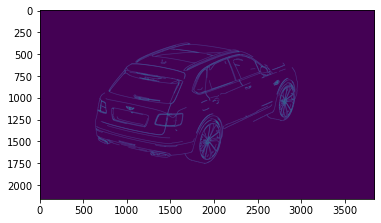

gelmeyen  0.594559585492228 1.7777777777777777
new_height 1302
offset 38
p's (376, 1753) (597, 2989)


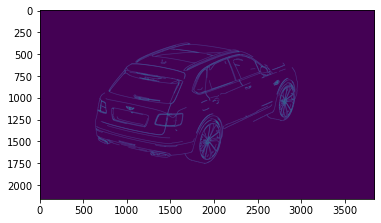

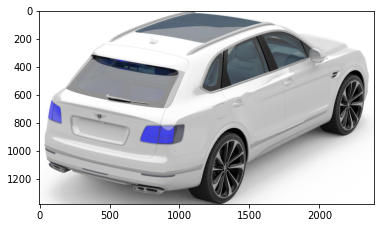

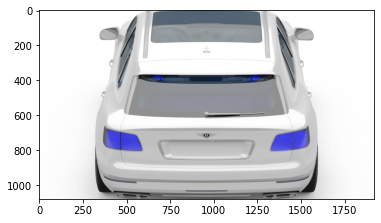

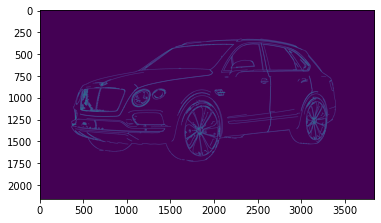

gelmeyen  0.46318917134367776 1.7777777777777777
new_height 1703
offset -150
p's (328, 1731) (511, 3240)


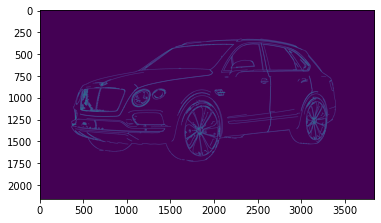

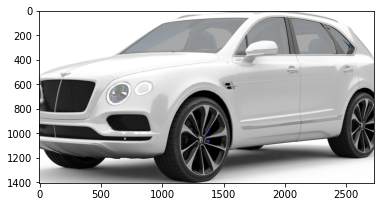

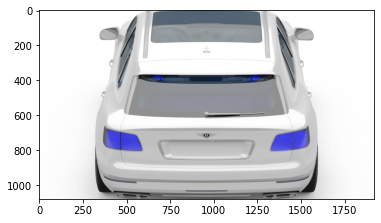

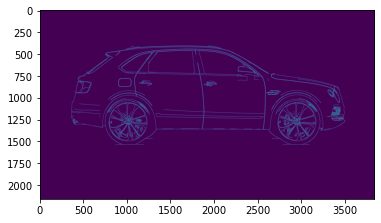

gelmeyen  0.3597833014659019 1.7777777777777777
new_height 1765
offset -318
p's (409, 1538) (676, 3178)


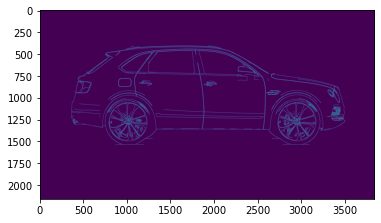

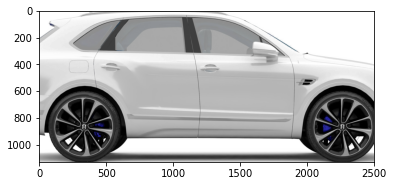

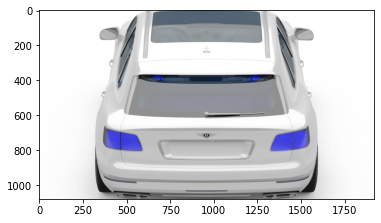

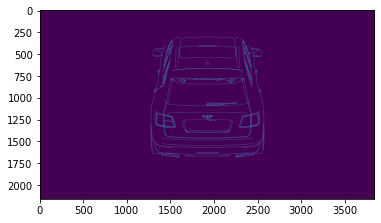

gelmeyen  1.063993831919815 1.7777777777777777
new_height 729
offset 326
p's (309, 1689) (945, 2894)


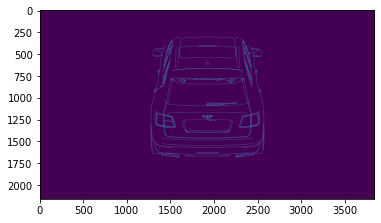

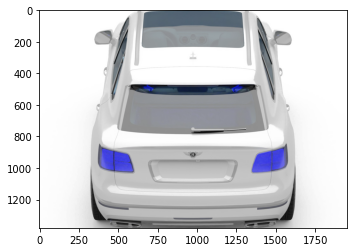

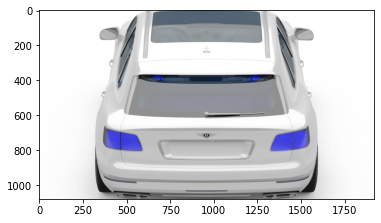

In [20]:
for image in images:
    p = image.split('.')[0]
    name = f'{p}_crops.png'
    canny,image= applyCanny(image)
    p1,p2 = crop_canny(canny)
    p1,p2 = list(p1),list(p2)
    # if p1[0]-100<0:
    #     p1[0]=0
    # if p1[1]-100<0:
    #     p1[1]=0
    # if p2[0]+100>1080:
    #     p2[0]=1920
    # if p2[1]+100>1920:
    #     p2[1]=1080
        
    crop = image[p1[0]:p1[1],p2[0]:p2[1]]
    # crop = image[p1[0]-100:p1[1]+100,p2[0]-100:p2[1]+100]
    plt.imshow(crop,'gray')
    plt.show()
    # resized = cv2.resize(crop,(1920,1080), interpolation = cv2.INTER_AREA)
    cv2.imwrite(name, crop)
    plt.imshow(resized)
    plt.show()